In [10]:
# Análise Exploratória e Modelagem com o Wine Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [11]:
# Carregar dataset
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target



In [12]:

# Informações iniciais
print("Shape do dataset:", df.shape)
print("\nTipos de dados:")
print(df.dtypes)
print("\nClasses alvo:", wine.target_names)


Shape do dataset: (178, 14)

Tipos de dados:
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int64
dtype: object

Classes alvo: ['class_0' 'class_1' 'class_2']


In [13]:

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe())



Estatísticas descritivas:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         

In [14]:

# Verificar valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())



Valores nulos por coluna:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


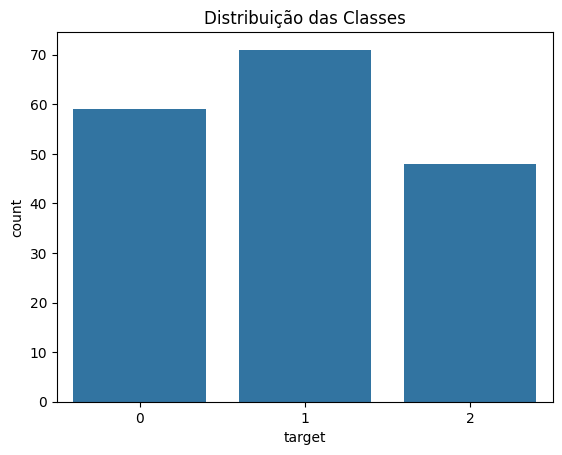

In [15]:

# Visualização: Distribuição das classes
sns.countplot(x='target', data=df)
plt.title("Distribuição das Classes")
plt.show()


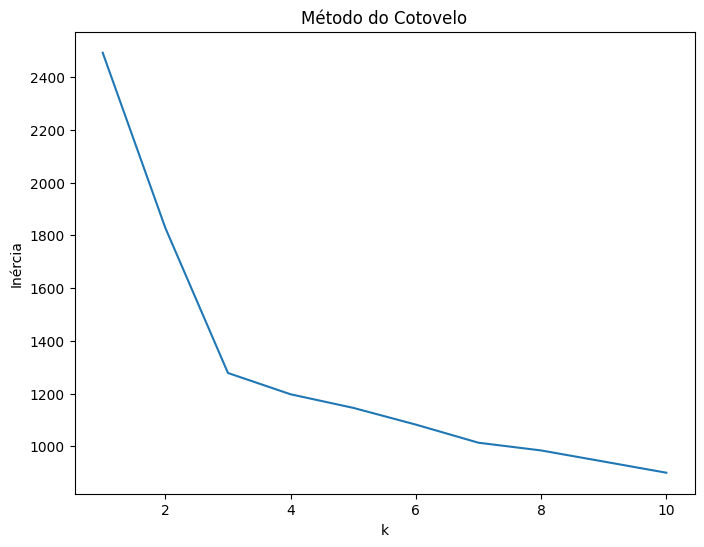

In [22]:
# Método do Cotovelo para determinar número ideal de clusters
inertias = []
K = range(1, 11)

X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertias)
plt.xlabel('k')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()


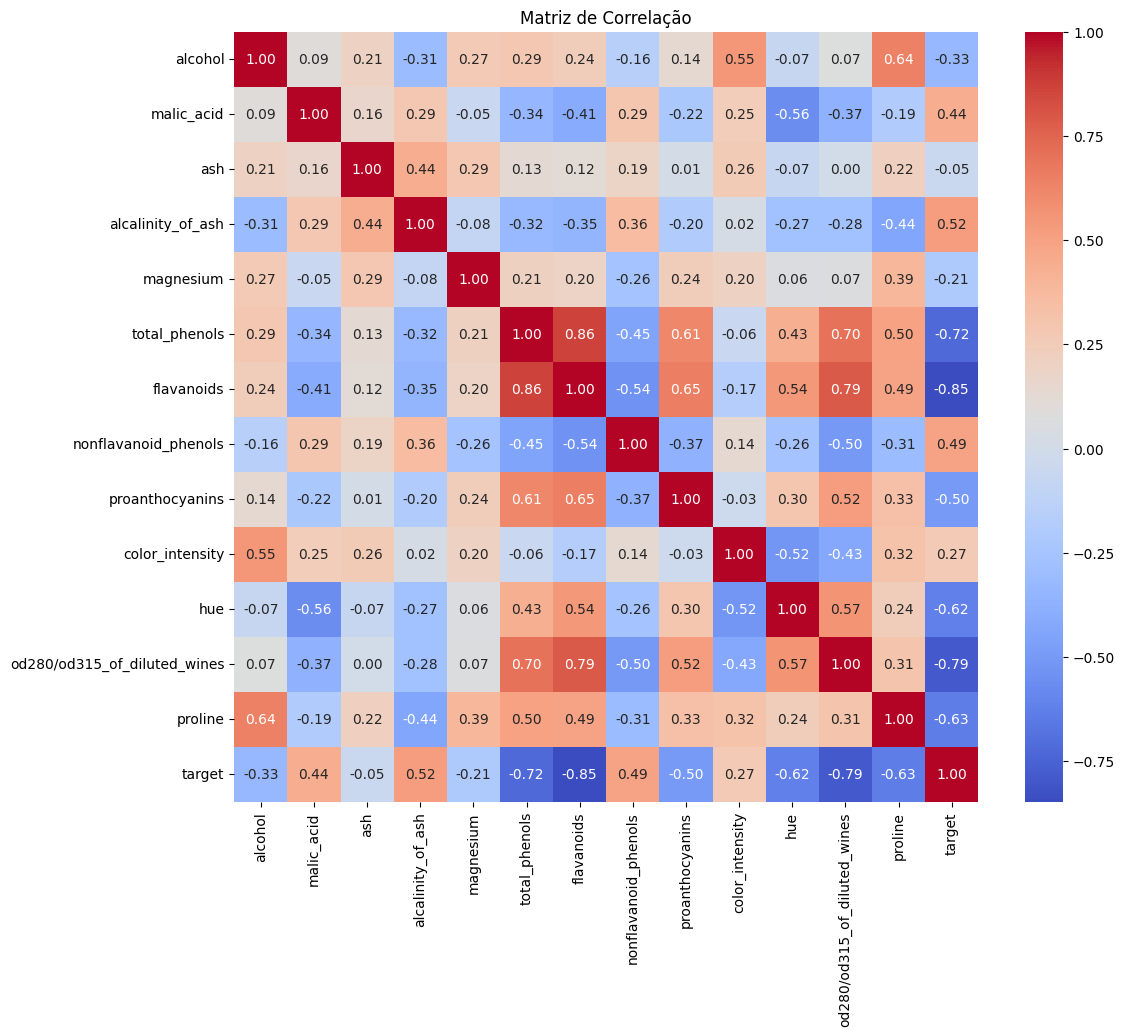

In [17]:

# Matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()


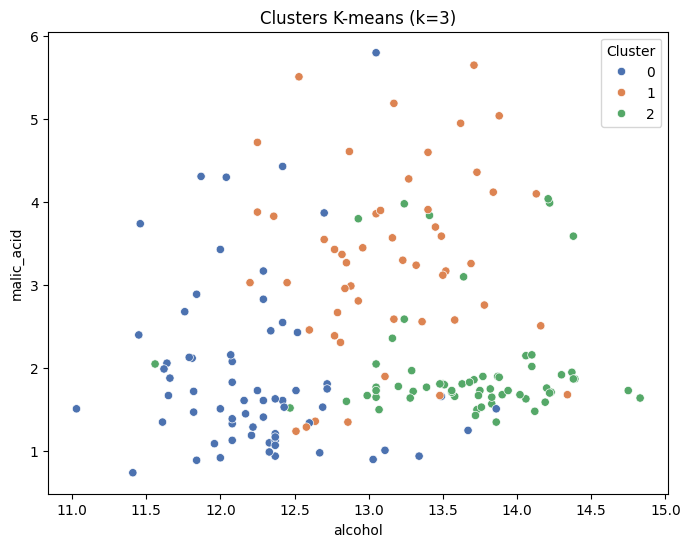


Centróides dos clusters:
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0 -0.926072   -0.394042 -0.494517           0.170602  -0.491712   
1  0.164907    0.871547  0.186898           0.524367  -0.075473   
2  0.835232   -0.303810  0.364706          -0.610191   0.577587   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0      -0.075983    0.020813             -0.033534         0.058266   
1      -0.979330   -1.215248              0.726064        -0.779706   
2       0.885237    0.977820             -0.562090         0.580287   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0        -0.901914  0.461804                      0.270764 -0.753846  
1         0.941539 -1.164789                     -1.292412 -0.407088  
2         0.171063  0.473984                      0.779247  1.125185  


In [18]:
# Agrupamento com K-means (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Adicionando as previsões ao dataframe
df['Cluster'] = kmeans.labels_

# Visualizando os clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='alcohol', y='malic_acid', hue='Cluster', palette='deep')
plt.title('Clusters K-means (k=3)')
plt.show()

# Centróides
print("\nCentróides dos clusters:")
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df.drop(['target', 'Cluster'], axis=1).columns)
print(centroids)


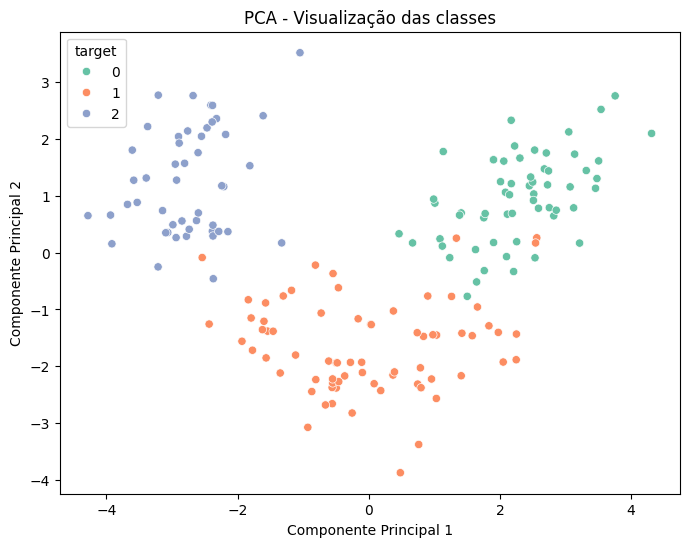

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set2")
plt.title("PCA - Visualização das classes")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


In [20]:

# Modelagem com Regressão Logística
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

modelo = LogisticRegression(max_iter=10000)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Avaliação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [21]:


print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


Matriz de Confusão:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
